## <center>COMP20008 - 2018 - SM2 - Project Phase 1</center>
<center>Release Date: 11:59am Monday, $13^{th}$ August 2018</center>
<center>Due Date: 11:59am Friday, $31^{st}$ August 2018</center>
<center>Submission is via the LMS</center>
<span style="color:red">Please, make sure you get a submission confirmation email once you submit your assignment. Otherwise, it will be considered as a late submission.</span> 

#### Phase 1: Warmup - Python Exercises (20 marks, worth 20% of subject grade) 

In this phase, you will practice your Python wrangling skills with a publicly available dataset. The dataset is obtained through the TMDB (The Movie DB) API. It contains information on movies featured in the Full MovieLens Dataset and released on or before July 2017. The main features of the Movies Metadata file include posters, backdrops, budget, revenue, release dates, languages, production countries and companies. 

You will be working with the following dataset in this phase: 
- Movies\_tmdb.csv: It has a set of movie records (approx. 45,000), released **on or before July 2017**. Note that this dataset is quite large, and you may find it beneficial during development, to first test your code on a smaller sample of this data.

Libraries to use are Pandas and Matplotlib. You will need to write Python 3 code and work with Series and DataFrames discussed in workshop week 2 and data cleaning and basic visualisations covered in workshop weeks 3-4. If you are using other packages, you must provide an explanation in your code about why it is necessary.

### Import Required Python Libraries and Load the Data 

Please write here all the Python libraries you will be using! Also load the dataset (.csv) in a dataframe object.

In [56]:
#import ....
import pandas as pd
import numpy as np
import re      # add this library to use regular expression to solve Q3.2 and Q4.4
import matplotlib.pyplot as plt   #solve all questions in Q5
import calendar    #be used in Q5.2 get calender months
from pandas.plotting import parallel_coordinates #be used in Q5.5 get calender months
movies_df =  pd.read_csv("Movies_tmdb.csv", low_memory=False)


### 1 Understanding the Dataset <span style="color:red">**(3 Marks)**</span> 

1.1 Print the number of movies, number of attributes/columns, column names and datatypes. The output of this step should look like **(2 Marks)** 

    *** 
    Q1.1 
    Number of movies: # 
    Number of attributes/columns: #
    Column names: #
    Column datatypes: #
    ***
where # is the values/strings you find.

In [58]:
### answer Q1.1
print("***")
print('Q1.1')
Num_mov = len(movies_df.index)
Num_attr = len(movies_df.columns)
Col_names = list(movies_df.columns.values)
Col_datatypes = list(movies_df.dtypes.values)
print('Number of movies:',Num_mov)
print('Number of attributes/columns:',Num_attr)
print('Column names:',Col_names)
print('Column datatypes:',Col_datatypes)
print("***")

***
Q1.1
Number of movies: 45465
Number of attributes/columns: 24
Column names: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
Column datatypes: [dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64')]
***


1.2 In this assignment, we won't be using all the features (i.e. columns) which are included in the csv file, so create a new dataframe with the following columns: **(1 Marks)** 

\begin{array} {|r|r|r|r|r|r|r|}
\hline
title & genre & release\_date & runtime & budget &  revenue & original\_language \\
\hline
\end{array}

\begin{array} {|r|r|r|r|r|r|}
\hline
popularity & vote\_average & vote\_count & adult & production\_countries \\
\hline
\end{array}

You must keep the order of the columns as provided above. 
Output of this question should be printing the first TWO rows (i.e. movies) from the new created dataframe in the following format:

    *** 
    Q1.2
    The first two rows from the filtered movies dataframe are:
    #
    #
    ***
    
where each # represents one movie row.


In [59]:
### answer Q1.2
newMovies_df = movies_df.filter(['title','genres','release_date','runtime','budget','revenue','original_language','popularity','vote_average','vote_count','adult','production_countries'])
print('***')
print('Q1.2')
print("The first two rows from the filtered movies dataframe are: ")
print(newMovies_df.loc[:1])
print('***')


***
Q1.2
The first two rows from the filtered movies dataframe are: 
       title                                             genres release_date  \
0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   1995-10-30   
1    Jumanji  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   1995-12-15   

   runtime    budget      revenue original_language popularity  vote_average  \
0     81.0  30000000  373554033.0                en  21.946943           7.7   
1    104.0  65000000  262797249.0                en  17.015539           6.9   

   vote_count  adult                               production_countries  
0      5415.0  False  [{'iso_3166_1': 'US', 'name': 'United States o...  
1      2413.0  False  [{'iso_3166_1': 'US', 'name': 'United States o...  
***


### 2 Missing Values and Data Types <span style="color:red">**(5 Marks)**</span>

2.1 Most of the columns in the movies dataframe have object datatype, let's convert the **"popularity"** column to float64 datatype, **"title"** column to string and **"adult"** column to boolean. **(1 Mark)**

The output of this step should print the datatypes of all columns in the movies dataframe after the conversion. You should follow the following format:

    *** 
    Q2.1 Datatypes after conversion:
    # 
    ***

where # should be the datatypes of the dataframe columns. Note: You don't have to create a new dataframe for this question, instead you can use the same dataframe which you created in Q1.2. 

In [60]:
### answer Q2.1
newMovies_df['popularity']=newMovies_df['popularity'].apply(pd.to_numeric , errors = 'coerce')
newMovies_df['title'] = newMovies_df['title'].astype(str)
change_bool = {'True': True, 'False': False}   # convert strings to boolean first
newMovies_df['adult'] = newMovies_df['adult'].replace(change_bool)
newMovies_df['adult'] = newMovies_df['adult'].astype(bool)
print('***')
print('Q2.2')
print(newMovies_df.dtypes)
print('***')

***
Q2.2
title                    object
genres                   object
release_date             object
runtime                 float64
budget                   object
revenue                 float64
original_language        object
popularity              float64
vote_average            float64
vote_count              float64
adult                      bool
production_countries     object
dtype: object
***


2.2 Now, we will deal with the missing values as a preprocessing step before performing any further analysis. Let's first print the total number of missing values for each column separately. Following this, you should print the percentage of movies with incomplete data in any of its attributes (i.e. missing values). Note: A movie is considered incomplete record if it has a missed value in at least one of its features. **(2 Marks)**

Note: missing values might be 0, nan, or empty cell. 


    *** 
    Q2.2 Number of missing values per attribute:
    col_1: x 
    col_2: x
    ...
    col_n: x
    ***
    % of movies with incomplete data: #
    ***
Replace col_1,col_2 ... col_n with the columns' names, x with the calculated values, and # with the calculated percentage. 


In [61]:
### answer Q2.2
# for this question i only consider NAN value as missing b
print('***')
print('Q2.2')
print('Number of missing values per attribute: ')
for i in newMovies_df:
    print((i)+': '+str(newMovies_df[i].isnull().sum()))

#use .any(axis=1) to get all columns with Nan value
total_num =newMovies_df.isnull().any(axis=1).sum()
percentage = total_num/Num_mov
print(('% of movies with incomplete data: ')+'{0:.5%}'.format(percentage))

***
Q2.2
Number of missing values per attribute: 
title: 0
genres: 0
release_date: 87
runtime: 262
budget: 0
revenue: 5
original_language: 11
popularity: 5
vote_average: 5
vote_count: 5
adult: 0
production_countries: 3
% of movies with incomplete data: 0.76102%


2.3 Write code that will add a new column called "runtime_non_missing" to the movies dataframe. The values in the new column should be copied from the "runtime" column and replaces all missing values in this column with the average of non-missing values for that column. **(2 Marks)**. 

The output of this question should print the average calculated value in the following format:
    
    *** 
    Q2.3 Missing values in 'runtime' column are replaced with: 
    #
    ***

Where # is the calculated value. 

Do you think it will be better to replace the missing values in the "runtime" column with the median instead of the average? Yes/No - Why? 

In [66]:
### answer Q2.3 
runtime_non_missing_S = newMovies_df['runtime']
runtime_mean = runtime_non_missing_S.mean()
runtime_non_missing_S=runtime_non_missing_S.fillna(runtime_mean)
newMovies_df['runtime_non_missing'] = runtime_non_missing_S    #use .mean() to calculate mean of runtime

print('***')
print('Q2.3 Missing values in \'runtime\' column are replaced with:')
print(runtime_mean)
print('***')


***
Q2.3 Missing values in 'runtime' column are replaced with:
94.12819945578833
***


### 3 Cleaning Dataset <span style="color:red">**(8 Marks)**</span>

3.1 In this question, you will deal with the datetime datatype. The question has three parts as following:  **(4 Marks)**.

Dealing with data formats is an essential step in the data wrangling pipeline. One of the issues is that data entry might be inconsistent. For example, by looking at the "release_date" column, you will find two different formats for the date value: '%m/%d/%Y' and '%Y-%m-%d'. Write code which converts the "release_date" into datetime datatype and <span style="color:blue"> consider reading both formats correctly. </span> The final datetime format should be '%m/%d/%Y'.

Another issue is the wrong values for some of these dates, for example some movies have the "release_date" after July 2017. However, in the description of the dataset, it says the collected movies released on or before July 2017. To deal with this issue, write code which removes any suspicious records (i.e. any movie which has a "release_date" after July 2017). 

In this assignment, we are not interested in analysing movies released before 1990. Therefore, as a preparation for our next questions, we only want to keep movies with release date between Jan 1990 and July 2017 (inclusive, i.e. Jan 1990 $\le$ release_date $\le$ July 2017) in the movies dataframe. So write code to delete all movies released outside this interval or has a nan/empty "release_date". You should display the number of the records (i.e. movies) in the final filtered movies dataframe. 

The output of this question should be in the following format:

    *** 
    Q3.1 
    The number of movies with release date between Jan-1990 and July-2017: #
    ***

Where # is the calculated number.

#### <span style="color:orange"> Note: The resulting dataframe will be used to answer the remaining questions.</span>

3.2 You might have noticed that the data of the genres column is represented as a list of dictionaries. Let's change this format into an easier one. Write code to convert the values of genres column into a list of strings instead of a list of dictionaries, keeping only the value of the "name" attribute. For example, the value <span style="color:blue"> [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]</span> should be <span style="color:green">['Animation','Comedey','Family']</span>. The newly converted values should be stored in an extra new column called "genres_cleaned". **(4 Marks)**. 

You should display the first 5 rows of the movies dataframe after adding this new column. The output of this question should be in the following format:

    *** 
    Q3.2
    The first 5 rows after adding the "genres_cleaned" column are:
    #
    ***

where # is the first 5 rows in the movies dataframe.

In [63]:
### answer Q3.2
genres_cleaned_L = []
regex = re.compile('\'name\': \'(.*?)\'')    #use regular expression to get genres 
#use for loop to create a new list and append it to dataframe
for i in newMovies_df['genres']:
    genres = regex.findall(i)
    genres_cleaned_L.append(genres)
genres_cleaned_S = pd.Series(genres_cleaned_L)          
newMovies_df['genres_cleaned'] = genres_cleaned_S

print("***")
print('Q3.2')
print('he first 5 rows after adding the "genres_cleaned" column are:')
print(newMovies_df.head(5))
print("***")

***
Q3.2
he first 5 rows after adding the "genres_cleaned" column are:
                         title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                              genres release_date  runtime  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   1995-10-30     81.0   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   1995-12-15    104.0   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   1995-12-22    101.0   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   1995-12-22    127.0   
4                     [{'id': 35, 'name': 'Comedy'}]   1995-02-10    106.0   

     budget      revenue original_language  popularity  vote_average  \
0  30000000  373554033.0                en   21.946943           7.7   
1  65000000  262797249.0                en   17.015539           6.9   
2         0          0.0               

### 4 Basic statistics, summary and grouping <span style="color:red">**(10 Marks)**</span>

4.1 Write code that calculates the median and average of non-missing values in the budget column for movies released between 2000 and 2010 (inclusive, i.e. 2000 $\le$ release_year $\le$ 2010). **(2 Marks)**.

Your code should print out the results with the following format:
    
    ***
    Q4.1: Movies budget (2000-2010)
    Median: # 
    Average: # 
    ***
    
where # is the calculated values <span style="color:blue">rounded to 1 decimal place</span>.

In [64]:
### answer Q4.1
recent_movies_df = newMovies_df[ (newMovies_df["release_date"] > pd.Timestamp("2000")) & (newMovies_df["release_date"] < pd.Timestamp('2010'))]
budget_S = recent_movies_df['budget'].apply(pd.to_numeric)
budget_S = budget_S[budget_S != 0].dropna()
Median = budget_S.median()
Average = budget_S.mean()

print("***")
print('Q4.1: Movies budget (2000-2010)')
print('Median:'+ '{:.1f}'.format(Median))
print('Average: '+ '{:.1f}'.format(Average))
print("***")


TypeError: Cannot compare type 'Timestamp' with type 'str'

4.2 Write code that returns a "popular_movies" dataframe with the most popular movie for each year since 2000. This means the dataframe will contain 18 movie, one for each year from 2000 till 2017). The dataframe should also contain the following columns: "title", "release\_date", "runtime" , "original\_language", "popularity". Also, the dataframe should be sorted by the "popularity" values in **descending** order. **(2 Marks)**.

Your code should print out the popular_movies dataframe in the following format:

    ***
    Q4.2: Most popular movies (2000-2017):
\begin{array} {lllll}
\\
\text{title} & \text{release date} & \text{runtime} & \text{language} & \text{popularity} \\
\# &&&& \\
\# &&&& \\
\# &&&& \\
.  &&&& \\
.  &&&& \\
.  &&&& \\
\# &&&& \\
\end{array}

    ***
where each # represents one row in the popular_movies dataframe.

In [54]:
### answer Q4.2
popular_df_final = pd.DataFrame(columns=['title','release_date','runtime','language','popularity'])
grouped = newMovies_df.groupby(newMovies_df['release_date'].map(lambda x: x.year))['popularity'] # use groupby to get most popular movies every year
popular_df = newMovies_df.loc[grouped.idxmax()] #use .idxmax() to get highest popular movies
popular_df = popular_df[ (popular_df["release_date"] > pd.Timestamp("2000")) & (popular_df["release_date"] < pd.Timestamp('2018'))]
popular_df_final = popular_df[['title','release_date','runtime','original_language','popularity']].copy()
popular_df_final = popular_df_final.sort_values(by=['popularity'],ascending = False)
popular_df_final = popular_df_final.set_index('title')
print('***')
print('Q4.2: Most popular movies (2000-2017):')
print(popular_df_final)
print('***')


***
Q4.2: Most popular movies (2000-2017):
                                                   release_date  runtime  \
title                                                                      
Minions                                              2015-06-17     91.0   
Wonder Woman                                         2017-05-30    141.0   
Big Hero 6                                           2014-10-24    102.0   
Deadpool                                             2016-02-09    108.0   
Avatar                                               2009-12-10    162.0   
The Dark Knight                                      2008-07-16    152.0   
The Avengers                                         2012-04-25    143.0   
Pirates of the Caribbean: The Curse of the Blac...   2003-07-09    143.0   
Rise of the Planet of the Apes                       2011-08-03    105.0   
Spirited Away                                        2001-07-20    125.0   
Thor: The Dark World                         

In [48]:
### answer Q3.1
newMovies_df["release_date"] = pd.to_datetime(newMovies_df["release_date"],errors = 'coerce')
newMovies_df["release_date"] = newMovies_df[["release_date"]][ (newMovies_df["release_date"] >= pd.Timestamp("1990-06-01")) & (newMovies_df["release_date"] <= pd.Timestamp('2017-07-01'))]
newMovies_df = newMovies_df.dropna(subset = ["release_date"])
newMovies_df = newMovies_df.reset_index()  #reset index from 0
print('***')
print("The number of movies with release date between Jan-1990 and July-2017: ")
print(newMovies_df["release_date"].count())
print('***')

***
The number of movies with release date between Jan-1990 and July-2017: 
29417
***


4.3 In this question, we will be working with the "vote\_average" and "vote\_count" columns. Write the code that returns the "title", "vote\_average", "vote\_count" of the 10 lowest voted average movies with at least 400 voters (i.e. "vote\_count)". The 10 movies should be displayed in ascending order by the "vote\_average" values. **(2 Marks)**.

Your code should print out the lowest voted average movies in the following format:

    ***
    Q4.3: The 10 movies with the lowest vote average are:
\begin{array} {lll}
\\
\text{title} & \text{vote average} & \text{vote count} \\
\# && \\
\# && \\
\# && \\
.  && \\
.  && \\
.  && \\
\# && \\
\end{array}

    ***
where each # represent one of the 10 movies.

In [49]:
### answer Q4.3
vote_rank = newMovies_df.sort_values(by=['vote_average'])
vote_rank = vote_rank.loc[vote_rank['vote_count']>400]
vote_rank_df = vote_rank[['title','vote_average','vote_count']].copy()
vote_rank_df = vote_rank_df.head(10)
vote_rank_df = vote_rank_df.set_index('title')

print('***')
print('Q4.3')
print(vote_rank_df)
print('***')


***
Q4.3
                         vote_average  vote_count
title                                            
Dragonball Evolution              2.9       475.0
Sharknado                         3.8       484.0
Jack and Jill                     4.0       619.0
Speed 2: Cruise Control           4.1       439.0
The Boy Next Door                 4.1      1034.0
Catwoman                          4.2       833.0
Batman & Robin                    4.2      1447.0
The Legend of Hercules            4.4       542.0
Fantastic Four                    4.4      2322.0
Jonah Hex                         4.5       427.0
***


4.4 Write code to display the count of movies for the top three movie production countries since Feb-2005 (i.e. Feb-2005 $\le$ release_date). **(4 Marks)**.

Your code should print out the result in the following format:
    
    ***
    Q4.4: Top 3 Movie Production Countries since Feb-2005:

\begin{array} {ll}
\\
\text{Country} & \text{Count of Produced Movies} \\
x & y \\
x & y \\
x & y \\
\end{array} 
 
    ***
    
where x represents the country name and y is the count of movies produced by this country.

In [50]:
### answer Q4.4
CountryMovies_df = newMovies_df[ (newMovies_df["release_date"] > pd.Timestamp("Feb-2005"))]

country_dict = {}
regex = re.compile('\'name\': \'(.*?)\'')

# use for loop to create a dictionary which store those country name
for i in CountryMovies_df['production_countries']:
    countries = regex.findall(i)
    for country in countries:
        if country in country_dict:
            country_dict[country]+=1
        else:
            country_dict[country]=1

# covert dictionary to new dataframe
Country_df = pd.DataFrame(columns = ['Country','Count of Produced Movies'])
Country_df['Country'] = country_dict.keys()
Country_df['Count of Produced Movies'] = country_dict.values()
Country_df = Country_df.sort_values(by ='Count of Produced Movies', ascending = False )
Country_df = Country_df.set_index('Country')

print('***')
print('Q4.4')
print(Country_df.head(3))
print('***')

***
Q4.4
                          Count of Produced Movies
Country                                           
United States of America                      7928
France                                        1661
United Kingdom                                1632
***


### 5 Visualization <span style="color:red">**(13 Marks)**</span>
5.1 Boxplots **(2 Marks)**.

Draw a plot consisting of two boxplots. One boxplot to show the distribution of revenue for adult movies. One boxplot to show the distribution of revenue for other non-adult movies. Note: You should not include movies with zero-revenue in the box-plot.

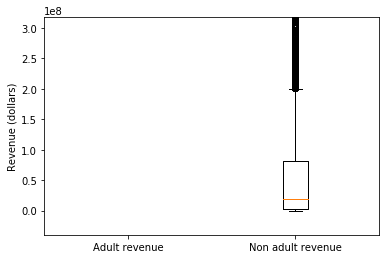

In [51]:
### answer Q5.1
adult = newMovies_df.loc[newMovies_df['adult']==True]
non_adult = newMovies_df.loc[newMovies_df['adult']==False]
adult_revenue = adult[adult['revenue']!=0]['revenue']
non_adult_revenue = non_adult[non_adult['revenue']!=0]['revenue']
data = [adult_revenue,non_adult_revenue]
lab = ['Adult revenue','Non adult revenue']
q1=non_adult_revenue.quantile(.25)
q3=non_adult_revenue.quantile(.75)
iqr=q3-q1
plt.boxplot(data,labels = lab)
plt.ylim(-0.5*iqr,4*iqr)
plt.ylabel('Revenue (dollars)')

plt.show()

## 5.2 Histogram **(2 Marks)**

Draw a bar plot showing month of year (x-axis) versus total number of movies released on that month (y-axis). Each bar will represent the total number of movies released on a specific month across all years. 

Is there any relation between the month of the year and the total number of movies? Yes/No - Explain?

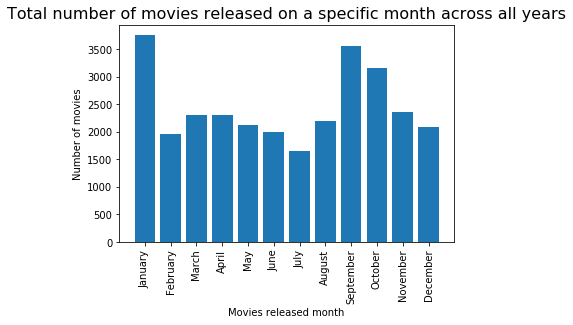

In [52]:
### answer code Q5.2
#use group by to get number of movies every year
grouped = newMovies_df.groupby(newMovies_df['release_date'].map(lambda x: x.month)).agg('count')
monthly_movies = grouped['title']
months = [calendar.month_name[i] for i in range(1,13)]
plt.title("Total number of movies released on a specific month across all years", fontsize=16)
plt.bar(np.arange(len(monthly_movies)),monthly_movies)
plt.xticks( np.arange(len(months)),months, rotation=90)
plt.xlabel("Movies released month")
plt.ylabel("Number of movies")
plt.show()

5.3 Scatter plot **(3 Marks)**

In this question, we will analyze the relation between few columns in the movies dataset. Draw four plots with the following four scatter/line plots:
    
    1- Non-zero revenue movies (x-axis) versus number of genres.
    2- Non-zero revenue movies (x-axis) versus release year.
    3- Non-zero revenue movies (x-axis) versus runtime.
    4- Non-zero revenue movies (x-axis) versus vote average.
    
Pick one of the four plots and justify/explain the relation between the two attributes. You should mention whether the relation is positive, negative or random. Did you expect this type of relation, Yes/No? Why?

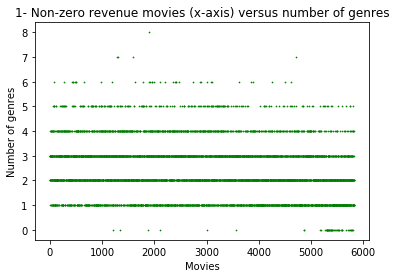

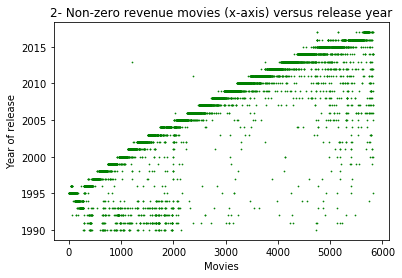

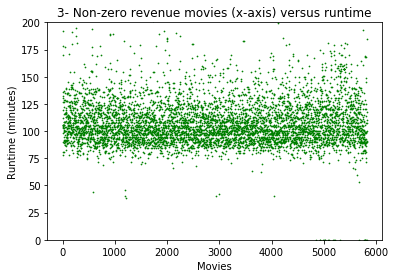

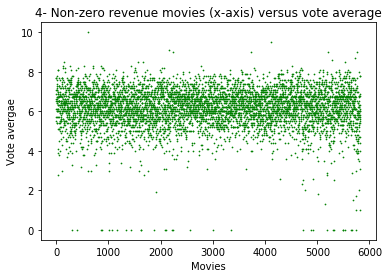

In [53]:
### answer Q5.3
have_revenue = newMovies_df[newMovies_df['revenue']!=0]
num_genres = have_revenue['genres_cleaned'].apply(lambda x: len(x))
valid_movies = np.arange(len(num_genres.index))
plt.scatter(valid_movies,num_genres,color='g',s = 0.5)
plt.xlabel("Movies")
plt.ylabel("Number of genres")
plt.title('1- Non-zero revenue movies (x-axis) versus number of genres')
plt.show()

release_year = have_revenue['release_date'].dt.year
plt.scatter(np.arange(len(num_genres.index)),release_year,color='g',s = 0.5)
plt.xlabel("Movies")
plt.ylabel("Year of release")
plt.title('2- Non-zero revenue movies (x-axis) versus release year')
plt.show()

runtime = have_revenue['runtime']
plt.scatter(np.arange(len(num_genres.index)),runtime,color='g',s = 0.5)
plt.ylim(0,200) # Most movies' runtime less than 200 minutes so set upper limit to 200 minutes make plot more clear
plt.xlabel("Movies")
plt.ylabel("Runtime (minutes)")
plt.title('3- Non-zero revenue movies (x-axis) versus runtime')
plt.show()

vote_average = have_revenue['vote_average']
plt.scatter(np.arange(len(num_genres.index)),vote_average,color='g',s = 0.5)
plt.xlabel("Movies")
plt.ylabel("Vote avergae")
plt.title('4- Non-zero revenue movies (x-axis) versus vote average')
plt.show()

5.4 Pie chart **(2 Marks)**

Create a pie chart showing the number of movies for each genre. For example, if a movie is classified as both comedey and action then the count for each of the action and comedey slices should be increased by 1. Each slice of the pie should have a different colour and contain a percentage number listing its relative size. Also, each slice of the pie should have a label next to it indicating which genre it corresponds to.

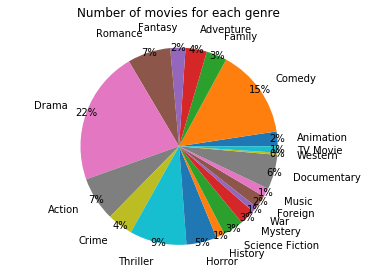

In [162]:
### answer Q5.4
genres = newMovies_df['genres_cleaned']
genres_dictionary = {}
#use dictionary to count number of movies each genre
def make_dict(input):
    for i in input:
        if i in genres_dictionary:
            genres_dictionary[i]+=1
        else:
            genres_dictionary[i]=1
genres.apply(make_dict)
values = genres_dictionary.values()
geners_key = genres_dictionary.keys()
#set labeldistance = 1.2 to make genre more clear
plt.pie(values,explode=None,labels=geners_key,labeldistance = 1.2,autopct='%1.0f%%',pctdistance=1.0)
plt.axis('equal')
plt.title('Number of movies for each genre\n')
plt.show()


5.5 Parallel co-ordinates **(4 Marks)**

In this question, we will the parallel co-ordinates plot to visualize the trend/relation between some of the features in the movies dataset. You should write the code that implements the following steps:

1. Delete all movies (rows) with missing values in any of the following features: budget, runtime, popularity, vote_average, and revenue. 

2. Then for each of the features, normalise its values to lie within the range [0-1] (0 to 1 inclusive). Use the the following formula for normalising a feature:

** $newvalue = (oldvalue - min) / (max - min) $ ** where min is the minimum value for the feature, max is the maximum value for the feature, newvalue is the normalised value for the feature and oldvalue is the old (un-normalised value).

3. Using these normalised features, compute the mean budget, runtime, popularity, vote_average, and revenue for each year. 

4. Finally, draw a parallel co-ordinates plot, each line correspondes to a different year. The ordering of the features for the plot should be budget(leftmost), runtime, popularity, vote_average, and revenue(rightmost). 

Colour the movies with $release\_year < 2000$ in red,  $2000 \geqslant release\_year < 2010 $ in green and $release\_year \geqslant 2010$ in blue. Provide a legend mapping colours to day type.

From the plot, can you see any relation between the revenue and popularity features? Yes/No- Explain? 

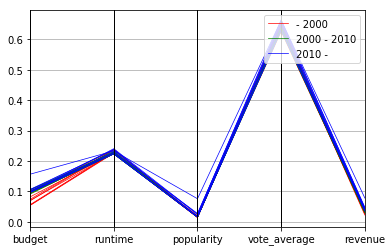

In [163]:
### answer Q5.5
# delete all 0 values
newMovies_df['budget']=newMovies_df['budget'].apply(pd.to_numeric)
cleaned_df = newMovies_df[newMovies_df['budget']!=0]
cleaned_df = cleaned_df[cleaned_df['runtime']!=0]
cleaned_df = cleaned_df[cleaned_df['popularity']!=0]
cleaned_df = cleaned_df[cleaned_df['vote_average']!=0]
cleaned_df = cleaned_df[cleaned_df['revenue']!=0]

#normalised all data
cleaned_df['budget'] = (cleaned_df['budget']-cleaned_df['budget'].min())/(cleaned_df['budget'].max()-cleaned_df['budget'].min())
cleaned_df['runtime'] = (cleaned_df['runtime']-cleaned_df['runtime'].min())/(cleaned_df['runtime'].max()-cleaned_df['runtime'].min())
cleaned_df['popularity'] = (cleaned_df['popularity']-cleaned_df['popularity'].min())/(cleaned_df['popularity'].max()-cleaned_df['popularity'].min())
cleaned_df['vote_average'] = (cleaned_df['vote_average']-cleaned_df['vote_average'].min())/(cleaned_df['vote_average'].max()-cleaned_df['vote_average'].min())
cleaned_df['revenue'] = (cleaned_df['revenue']-cleaned_df['revenue'].min())/(cleaned_df['revenue'].max()-cleaned_df['revenue'].min())

data = pd.DataFrame()
grouped = cleaned_df.groupby(cleaned_df['release_date'].map(lambda x: x.year))
data['budget'] = grouped['budget'].mean()
data['runtime'] = grouped['runtime'].mean()
data['popularity'] = grouped['popularity'].mean()
data['vote_average'] = grouped['vote_average'].mean()
data['revenue'] = grouped['revenue'].mean()

period_list = []


for i in data.index:
    if (i < 2000):
        period_list.append('- 2000')
    elif (i >= 2000) and (i <2010):
        period_list.append('2000 - 2010')
    elif (i >= 2010):
        period_list.append('2010 - ')
    
        
data['period'] = period_list

parallel_coordinates(data[['budget','runtime','popularity','vote_average','revenue','period']],'period',color=["r","g","b"],linewidth = 0.7)
plt.show()

### Marking scheme

Correctness (39 marks): For each of the 5 questions a mark will be allocated for level of correctness (does it provide the right answer, is the logic right), according to the number in parentheses next to each question. Note that your code should work for any data input formatted in the same way as Movies\_tmdb.csv. E.g. if a random sample of 20,000 records was taken from Movies\_tmdb.csv, your code should provide a correct answer if this was instead used as the input.

Correctness will also take into account the readability and labelling provided for any plots and figures (plots should include title of the plot, labels/scale on axes, names of axes, and legends for colours where appropriate).

Coding style <span style="color:red">**(1 Mark)**</span>: Mark will be allocated for coding style. In particular the following aspects will be considered:

- Formatting of code (e.g. use of indentation and overall readability for a human)   
- Code modularity and flexibility. Use of functions or loops where appropriate, to avoid redundant or excessively verbose definitions of code.
- Use of python library functions (you should avoid reinventing logic if a library function can be used instead)
- Code commenting and clarity of logic. You should provide comments about the logic of our code for each question, so that it can be easily understood by the marker.

### Submission Instructions
Via the LMS, submit a jupyter notebook containing the code. Make sure you get a submission receipt via email. If you didn't get a receipt via email, this means we didn't receive your submission and it will be considered as late submission.

### Other
Extensions and Late Submission Penalties: If requesting an extension due to illness, please submit a medical certificate to the lecturer. If there are any other exceptional circumstances, please contact the lecturer with plenty of notice. Late submissions without an approved extension will attract a penalty of 10% of the marks available per 24hr period (or part thereof)
that it is late. E.g. A late submission will be penalised 2 marks if 4 hours late, 4 marks if 28 hours late, 6 marks if 50 hours late, 8 marks if 73 hours late, 10 marks if 106 hours late, etc.

Phase 1 is expected to require 20-24 hours work.

### Academic Honesty

You are expected to follow the academic honesty guidelines on the University website
https://academichonesty.unimelb.edu.au

### Further Information

A project discussion forum has also been created on the subject LMS. Please use this in the first instance if you have questions, since it will allow discussion and responses to be seen by everyone. The Phase 1 project page will also contain a list of frequently asked questions.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]